# Read Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
train = pd.read_csv("C:/Documents/DataScience/1/training_set.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Dealing with Missing Data

In [3]:
train.Alley = train.Alley.fillna("No_Alley")

In [4]:
train.FireplaceQu = train.FireplaceQu.fillna("No_Fireplace")

In [5]:
train.PoolQC = train.PoolQC.fillna("No_Pool")

In [6]:
train.Fence = train.Fence.fillna("No_Fence")

In [7]:
train.MiscFeature = train.MiscFeature.fillna("None")

In [8]:
for i in train.columns:
    if(train[i].dtype=='object'):
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        x = train[i].mean()
        train[i] = train[i].fillna(x)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Define our Y column and temp X column

In [10]:
Y = train[["SalePrice"]]
X = train.drop(labels=["SalePrice","Id"],axis=1)

# Exploratory Data Analysis

In [11]:
train.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [12]:
train.corr()[["SalePrice"]].sort_values(by="SalePrice").tail(20).index

Index(['HalfBath', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage',
       'BsmtFinSF1', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd',
       'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice'],
      dtype='object')

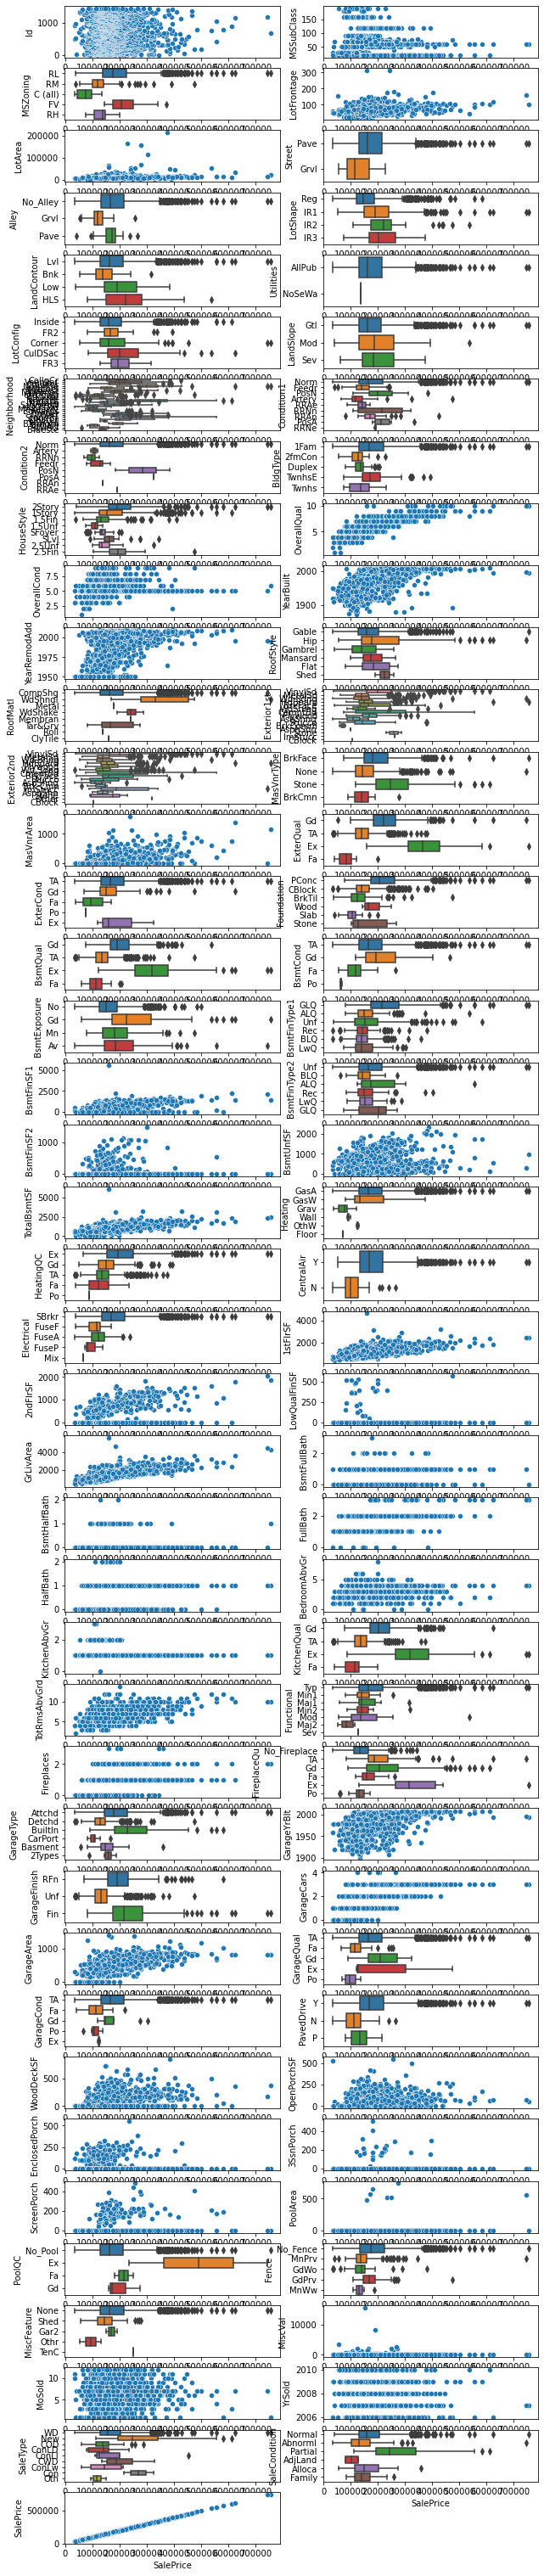

In [13]:
from warnings import filterwarnings
filterwarnings("ignore")
x =1
plt.figure(figsize=(10,55))

for i in train.columns:
    if(train[i].dtype=='object'):
        plt.subplot(41,2,x)
        sb.boxplot(train.SalePrice,train[i])
        x = x+1
    else:
        plt.subplot(41,2,x)
        sb.scatterplot(train.SalePrice,train[i])
        x=x+1

<AxesSubplot:>

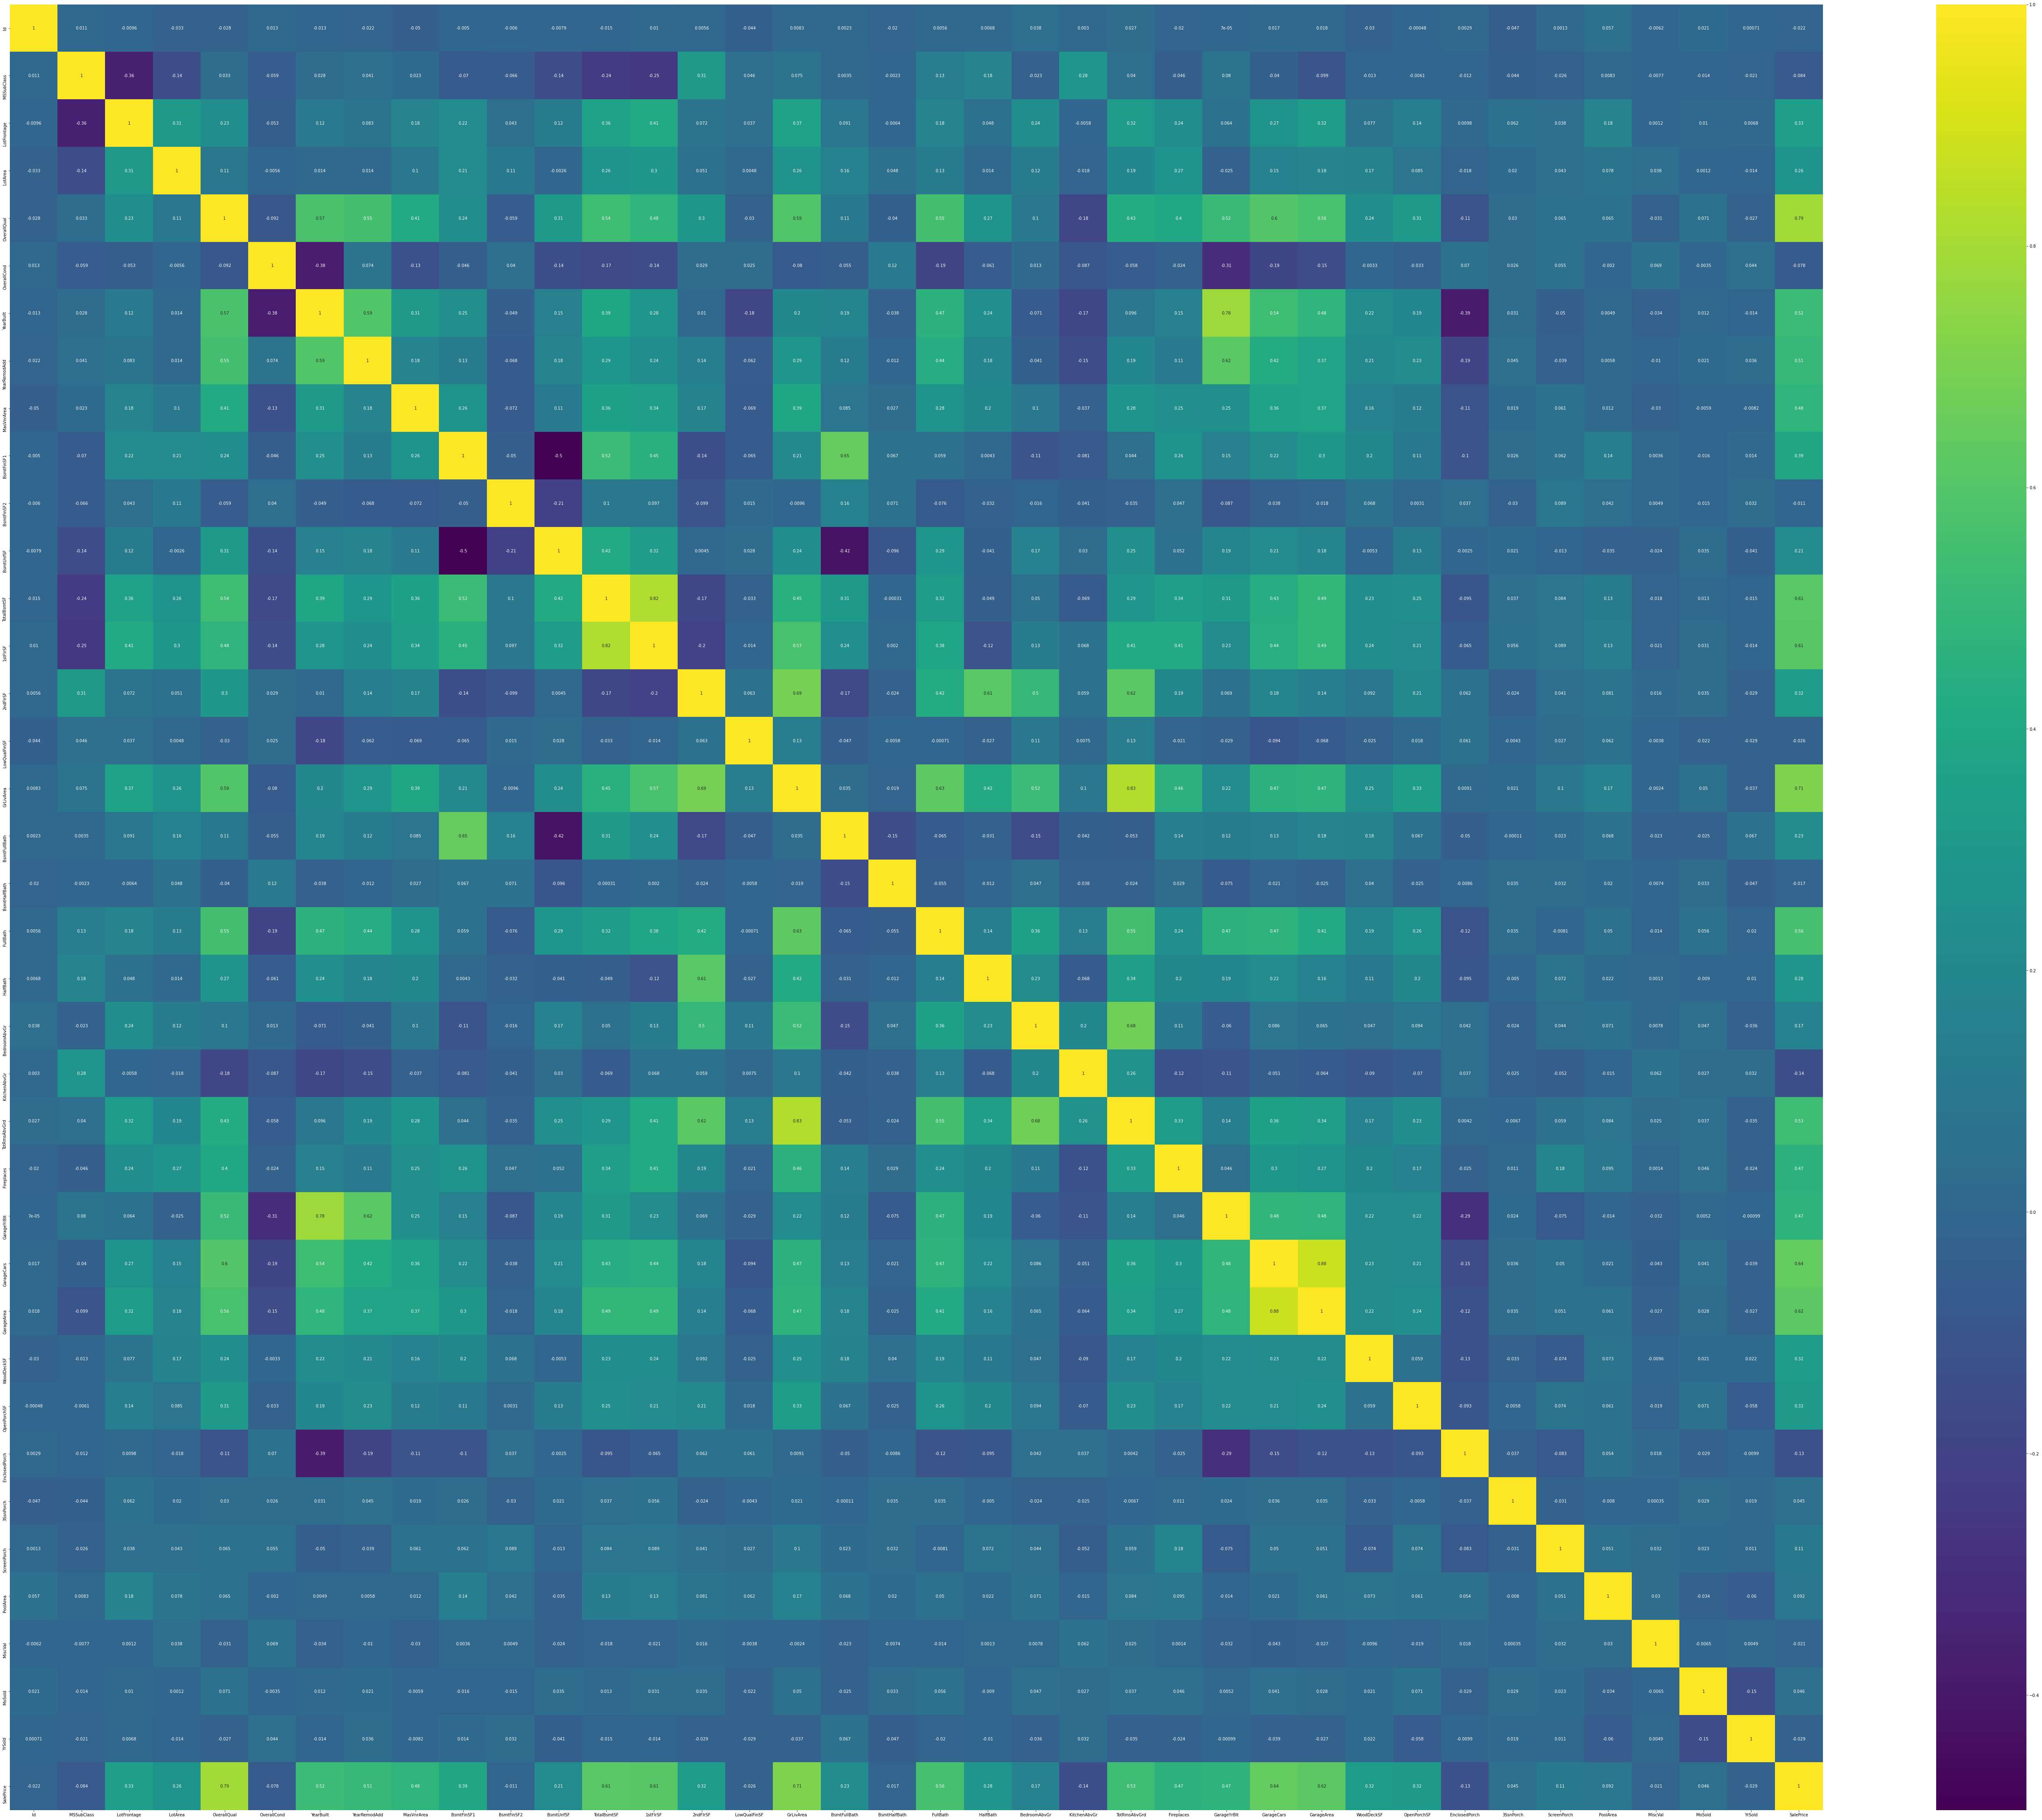

In [14]:
plt.figure(figsize=(99,81))
sb.heatmap(train.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

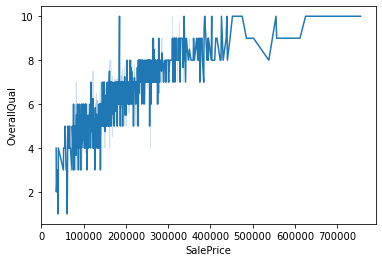

In [15]:
sb.lineplot(train.SalePrice,train.OverallQual)

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

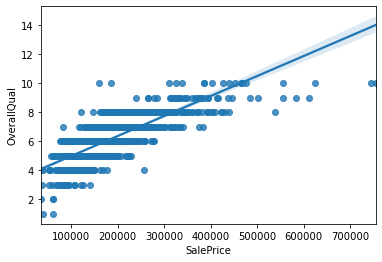

In [16]:
sb.regplot(train.SalePrice,train.OverallQual)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

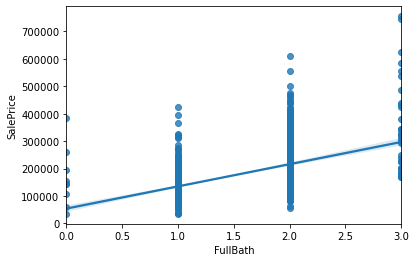

In [17]:
sb.regplot(train.FullBath,train.SalePrice)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

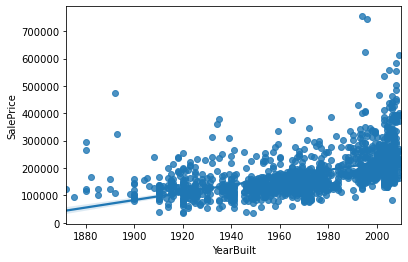

In [18]:
sb.regplot(train.YearBuilt,train.SalePrice)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

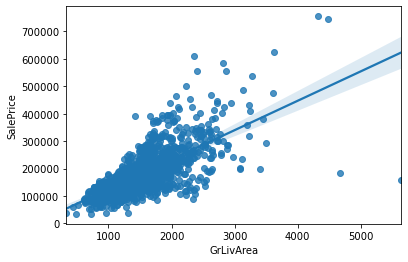

In [19]:
sb.regplot(train.GrLivArea,train.SalePrice)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

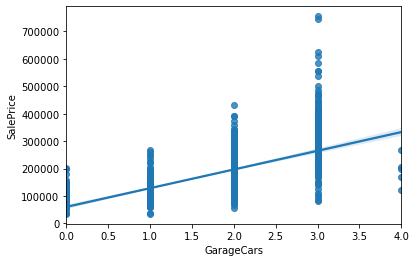

In [20]:
sb.regplot(train.GarageCars,train.SalePrice)

In [21]:
imp_con_cols = list(train.corr()['SalePrice'].sort_values().tail(20).index)
imp_con_cols.remove("SalePrice")

In [22]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [23]:
imp_cat_cols = []
for i in cat:
    pval = ANOVA(train,i,'SalePrice')
    print("SalePrice vs",i,ANOVA(train,i,'SalePrice'))
    if(pval < 0.05):
        imp_cat_cols.append(i)

SalePrice vs MSZoning 0.0
SalePrice vs Street 0.117
SalePrice vs Alley 0.0
SalePrice vs LotShape 0.0
SalePrice vs LandContour 0.0
SalePrice vs Utilities 0.585
SalePrice vs LotConfig 0.0
SalePrice vs LandSlope 0.141
SalePrice vs Neighborhood 0.0
SalePrice vs Condition1 0.0
SalePrice vs Condition2 0.043
SalePrice vs BldgType 0.0
SalePrice vs HouseStyle 0.0
SalePrice vs RoofStyle 0.0
SalePrice vs RoofMatl 0.0
SalePrice vs Exterior1st 0.0
SalePrice vs Exterior2nd 0.0
SalePrice vs MasVnrType 0.0
SalePrice vs ExterQual 0.0
SalePrice vs ExterCond 0.0
SalePrice vs Foundation 0.0
SalePrice vs BsmtQual 0.0
SalePrice vs BsmtCond 0.0
SalePrice vs BsmtExposure 0.0
SalePrice vs BsmtFinType1 0.0
SalePrice vs BsmtFinType2 0.036
SalePrice vs Heating 0.001
SalePrice vs HeatingQC 0.0
SalePrice vs CentralAir 0.0
SalePrice vs Electrical 0.0
SalePrice vs KitchenQual 0.0
SalePrice vs Functional 0.0
SalePrice vs FireplaceQu 0.0
SalePrice vs GarageType 0.0
SalePrice vs GarageFinish 0.0
SalePrice vs GarageQual 

In [24]:
X[imp_cat_cols]

,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,Detchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,No_Alley,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1456,RL,No_Alley,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,...,Attchd,Unf,TA,TA,Y,No_Pool,MnPrv,None,WD,Normal
1457,RL,No_Alley,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No_Pool,GdPrv,Shed,WD,Normal
1458,RL,No_Alley,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,...,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [25]:
X[imp_con_cols].skew()

HalfBath        0.675897
OpenPorchSF     2.364342
2ndFlrSF        0.813030
WoodDeckSF      1.541376
LotFrontage     2.384950
BsmtFinSF1      1.685503
Fireplaces      0.649565
GarageYrBlt    -0.668175
MasVnrArea      2.676412
YearRemodAdd   -0.503562
YearBuilt      -0.613461
TotRmsAbvGrd    0.676341
FullBath        0.036562
1stFlrSF        1.376757
TotalBsmtSF     1.524255
GarageArea      0.179981
GarageCars     -0.342549
GrLivArea       1.366560
OverallQual     0.216944
dtype: float64

<AxesSubplot:ylabel='Density'>

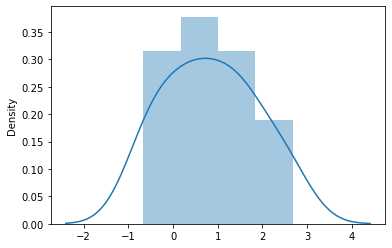

In [26]:
sb.distplot(X[imp_con_cols].skew())

(X[imp_con_cols].apply(np.log)).skew()

In [27]:
X[imp_con_cols].apply(np.log)

,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0.0,4.110874,6.749931,-inf,4.174387,6.559615,-inf,7.602401,5.278115,7.602401,7.602401,2.079442,0.693147,6.752270,6.752270,6.306275,0.693147,7.444249,1.945910
1,-inf,-inf,-inf,5.697093,4.382027,6.885510,0.000000,7.588830,-inf,7.588830,7.588830,1.791759,0.693147,7.140453,7.140453,6.131226,0.693147,7.140453,1.791759
2,0.0,3.737670,6.763885,-inf,4.219508,6.186209,0.000000,7.601402,5.087596,7.601902,7.601402,1.791759,0.693147,6.824374,6.824374,6.410175,0.693147,7.487734,1.945910
3,-inf,3.555348,6.628041,-inf,4.094345,5.375278,0.000000,7.599902,-inf,7.585789,7.557473,1.945910,0.000000,6.867974,6.628041,6.464588,1.098612,7.448334,1.945910
4,0.0,4.430817,6.959399,5.257495,4.430817,6.484635,0.000000,7.600902,5.857933,7.600902,7.600902,2.197225,0.693147,7.043160,7.043160,6.728629,1.098612,7.695303,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,3.688879,6.542472,-inf,4.127134,-inf,0.000000,7.600402,-inf,7.600902,7.600402,1.945910,0.693147,6.859615,6.859615,6.131226,0.693147,7.406711,1.791759
1456,-inf,-inf,-inf,5.855072,4.442651,6.672033,0.693147,7.589842,4.779123,7.594884,7.589842,1.945910,0.693147,7.636752,7.340836,6.214608,0.693147,7.636752,1.791759
1457,-inf,4.094345,7.049255,-inf,4.189655,5.616771,0.693147,7.570959,-inf,7.603898,7.570959,2.197225,0.693147,7.080026,7.049255,5.529429,0.000000,7.757906,1.945910
1458,-inf,-inf,-inf,5.902633,4.219508,3.891820,-inf,7.575585,-inf,7.598900,7.575585,1.609438,0.000000,6.982863,6.982863,5.480639,0.000000,6.982863,1.609438


In [28]:
X[imp_con_cols].skew()

HalfBath        0.675897
OpenPorchSF     2.364342
2ndFlrSF        0.813030
WoodDeckSF      1.541376
LotFrontage     2.384950
BsmtFinSF1      1.685503
Fireplaces      0.649565
GarageYrBlt    -0.668175
MasVnrArea      2.676412
YearRemodAdd   -0.503562
YearBuilt      -0.613461
TotRmsAbvGrd    0.676341
FullBath        0.036562
1stFlrSF        1.376757
TotalBsmtSF     1.524255
GarageArea      0.179981
GarageCars     -0.342549
GrLivArea       1.366560
OverallQual     0.216944
dtype: float64

In [29]:
imp_cols =[]
imp_cols.extend(imp_con_cols)
imp_cols.extend(imp_cat_cols)

In [30]:
X = X[imp_cols]

# Preprocessing

In [31]:
cat =[]
con=[]
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.get_dummies(X[cat])
X2= pd.DataFrame(ss.fit_transform(X[con]), columns=con)
Xnew = X2.join(X1)
Xnew

,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,GarageYrBlt,MasVnrArea,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.227585,0.216503,1.161852,-0.752176,-0.229372,0.575425,-0.951226,1.021157,0.511418,0.878668,...,0,0,0,1,0,0,0,0,1,0
1,-0.761621,-0.704483,-0.795163,1.626195,0.451936,1.171992,0.600495,-0.104483,-0.574410,-0.429577,...,0,0,0,1,0,0,0,0,1,0
2,1.227585,-0.070361,1.189351,-0.752176,-0.093110,0.092907,0.600495,0.937776,0.323060,0.830215,...,0,0,0,1,0,0,0,0,1,0
3,-0.761621,-0.176048,0.937276,-0.752176,-0.456474,-0.499274,0.600495,0.812705,-0.574410,-0.720298,...,0,0,0,1,1,0,0,0,0,0
4,1.227585,0.563760,1.617877,0.780197,0.633618,0.463568,0.600495,0.896086,1.364570,0.733308,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.227585,-0.100558,0.795198,-0.752176,-0.365633,-0.973018,0.600495,0.854395,-0.574410,0.733308,...,0,0,0,1,0,0,0,0,1,0
1456,-0.761621,-0.704483,-0.795163,2.033231,0.679039,0.759659,2.152216,-0.021102,0.084843,0.151865,...,0,0,0,1,0,0,0,0,1,0
1457,-0.761621,0.201405,1.844744,-0.752176,-0.183951,-0.369871,2.152216,-1.563645,-0.574410,1.024029,...,0,0,0,1,0,0,0,0,1,0
1458,-0.761621,-0.704483,-0.795163,2.168910,-0.093110,-0.865548,-0.951226,-1.188432,-0.574410,0.539493,...,0,0,0,1,0,0,0,0,1,0


# OLS(Linear model)

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y, test_size=0.2, random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     64.09
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:01:57   Log-Likelihood:                -13175.
No. Observations:                1168   AIC:                         2.680e+04
Df Residuals:                     942   BIC:                         2.795e+04
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.473e+15   2.45e+16     -0.182      0.855   -5.26e+16    4.37e+16
HalfBath                   480.8563   1123.095      0.428      0.669   -1723.202    2684.914
OpenPorchSF               1671.4120    816.734      2.046      0.041      68.583    3274.241
2ndFlrSF                  2.175e+04   8185.789      2.657      0.008    5687.933    3.78e+04
WoodDeckSF                1791.3294    795.843      2.251      0.025     229.499    3353.159
LotFrontage               1904.9483   1030.993      1.848      0.065    -118.361    3928.258
BsmtFinSF1                1.069e+04   1346.884      7.934      0.000    8042.325    1.33e+04
Fireplaces                4317.1050   1675.376      2.577      0.010    1029.203    7605.007
GarageYrBlt               -197.6110   1459.754     -0.135      0.892   -3062.357    2667.135
MasVnrArea                4673.2070   1112.565      4.200      0.000    2489.815    6856.599
YearRemodAdd              4460.8881   1138.668      3.918      0.000    2226.269    6695.507
YearBuilt                 5348.1461   2304.097      2.321      0.020     826.390    9869.902
TotRmsAbvGrd               482.4761   1513.722      0.319      0.750   -2488.181    3453.133
FullBath                   735.6461   1269.339      0.580      0.562   -1755.414    3226.706
1stFlrSF                  1.415e+04   7896.446      1.791      0.074   -1350.501    2.96e+04
TotalBsmtSF               7385.3184   1834.875      4.025      0.000    3784.403     1.1e+04
GarageArea                1327.6929   1731.781      0.767      0.443   -2070.902    4726.288
GarageCars                3324.8094   1748.048      1.902      0.057    -105.709    6755.328
GrLivArea                 9035.4234   1.05e+04      0.859      0.390   -1.16e+04    2.97e+04
OverallQual                1.06e+04   1495.736      7.086      0.000    7662.698    1.35e+04
MSZoning_C (all)          1.273e+14   6.98e+14      0.182      0.855   -1.24e+15     1.5e+15
MSZoning_FV               1.273e+14   6.98e+14      0.182      0.855   -1.24e+15     1.5e+15
MSZoning_RH               1.273e+14   6.98e+14      0.182      0.855   -1.24e+15     1.5e+15
MSZoning_RL               1.273e+14   6.98e+14      0.182      0.855   -1.24e+15     1.5e+15
MSZoning_RM               1.273e+14   6.98e+14      0.182      0.855   -1.24e+15     1.5e+15
Alley_Grvl                1.025e+15   5.62e+15      0.182      0.855      -1e+16    1.21e+16
Alley_No_Alley            1.025e+15   5.62e+15      0.182      0.855      -1e+16    1.21e+16
Alley_Pave                1.025e+15   5.62e+15      0.182      0.855      -1e+16    1.21e+16
LotShape_IR1             -2.484e+14   1.36e+15     -0.182      0.855   -2.92e+15    2.43e+15
LotShape_IR2             -2.484e+14   1.36e+15     -0.182      0.855   -2.92e+15    2.43e+15
LotShape_IR3  

In [33]:
Q = pd.DataFrame(model.pvalues, columns=["Pval"]) #backward elemination OLS model
col_to_drop = list(Q.sort_values(by=['Pval']).tail(1).index)
print(col_to_drop)

Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2, random_state=21)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

['GarageYrBlt']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     61.49
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:01:57   Log-Likelihood:                -13220.
No. Observations:                1168   AIC:                         2.689e+04
Df Residuals:                     943   BIC:                         2.803e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -8.121e+15   3.12e+16     -0.260      0.795   -6.94e+16    5.31e+16
HalfBath                   386.1360   1173.497      0.329      0.742   -1916.831    2689.103
OpenPorchSF               1380.9798    840.093      1.644      0.101    -267.687    3029.647
2ndFlrSF                  2.376e+04   8730.677      2.722      0.007    6628.681    4.09e+04
WoodDeckSF                1968.8257    804.101      2.448      0.015     390.791    3546.861
LotFrontage               1994.7353   1042.769      1.913      0.056     -51.681    4041.151
BsmtFinSF1                1.003e+04   1385.207      7.238      0.000    7307.858    1.27e+04
Fireplaces                2675.6345   1869.723      1.431      0.153    -993.664    6344.933
MasVnrArea                3731.0419   1117.611      3.338      0.001    1537.750    5924.334
YearRemodAdd              3760.3095   1177.443      3.194      0.001    1449.597    6071.022
YearBuilt                 6749.0248   2416.502      2.793      0.005    2006.681    1.15e+04
TotRmsAbvGrd               529.7263   1578.640      0.336      0.737   -2568.329    3627.781
FullBath                   407.0908   1326.185      0.307      0.759   -2195.525    3009.707
1stFlrSF                  1.504e+04   8293.067      1.813      0.070   -1239.548    3.13e+04
TotalBsmtSF               7334.7227   2024.128      3.624      0.000    3362.406    1.13e+04
GarageArea                2761.6799   1759.523      1.570      0.117    -691.353    6214.713
GarageCars                1391.0256   1796.773      0.774      0.439   -2135.111    4917.162
GrLivArea                 9568.1229   1.12e+04      0.855      0.393   -1.24e+04    3.15e+04
OverallQual               8188.3169   1526.706      5.363      0.000    5192.182    1.12e+04
MSZoning_C (all)          4.043e+14   1.55e+15      0.260      0.795   -2.65e+15    3.45e+15
MSZoning_FV               4.043e+14   1.55e+15      0.260      0.795   -2.65e+15    3.45e+15
MSZoning_RH               4.043e+14   1.55e+15      0.260      0.795   -2.65e+15    3.45e+15
MSZoning_RL               4.043e+14   1.55e+15      0.260      0.795   -2.65e+15    3.45e+15
MSZoning_RM               4.043e+14   1.55e+15      0.260      0.795   -2.65e+15    3.45e+15
Alley_Grvl                2.078e+15   7.99e+15      0.260      0.795   -1.36e+16    1.78e+16
Alley_No_Alley            2.078e+15   7.99e+15      0.260      0.795   -1.36e+16    1.78e+16
Alley_Pave                2.078e+15   7.99e+15      0.260      0.795   -1.36e+16    1.78e+16
LotShape_IR1             -5.883e+14   2.26e+15     -0.260      0.795   -5.03e+15    3.85e+15
LotShape_IR2             -5.883e+14   2.26e+15     -0.260      0.795   -5.03e+15    3.85e+15
LotShape_IR3             -5.883e+14   2.26e+15     -0.260      0.795   -5.03e+15    3.85e+15
LotShape_Reg  

In [34]:
Q = pd.DataFrame(model.pvalues, columns=["Pval"]) #backward elemination OLS model
col_to_drop = list(Q.sort_values(by=['Pval']).tail(1).index)
print(col_to_drop)

Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2, random_state=21)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

['RoofMatl_ClyTile']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     61.50
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:01:58   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.689e+04
Df Residuals:                     943   BIC:                         2.803e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.754e+15   3.15e+16     -0.056      0.956   -6.35e+16       6e+16
HalfBath                   364.3755   1173.946      0.310      0.756   -1939.474    2668.225
OpenPorchSF               1392.7034    840.825      1.656      0.098    -257.401    3042.808
2ndFlrSF                  2.377e+04   8730.468      2.723      0.007    6637.575    4.09e+04
WoodDeckSF                1967.2698    804.071      2.447      0.015     389.294    3545.245
LotFrontage               2006.8060   1041.754      1.926      0.054     -37.618    4051.230
BsmtFinSF1                1.001e+04   1385.513      7.228      0.000    7295.899    1.27e+04
Fireplaces                2687.3159   1869.752      1.437      0.151    -982.041    6356.673
MasVnrArea                3726.0834   1117.416      3.335      0.001    1533.175    5918.992
YearRemodAdd              3766.0582   1177.250      3.199      0.001    1455.726    6076.390
YearBuilt                 6770.2564   2416.401      2.802      0.005    2028.111    1.15e+04
TotRmsAbvGrd               511.3403   1578.772      0.324      0.746   -2586.972    3609.652
FullBath                   393.8617   1325.906      0.297      0.766   -2208.205    2995.929
1stFlrSF                  1.503e+04   8292.735      1.813      0.070   -1242.584    3.13e+04
TotalBsmtSF               7364.9524   2024.825      3.637      0.000    3391.267    1.13e+04
GarageArea                2762.4018   1759.481      1.570      0.117    -690.549    6215.353
GarageCars                1385.0573   1796.629      0.771      0.441   -2140.796    4910.911
GrLivArea                 9567.2190   1.12e+04      0.855      0.393   -1.24e+04    3.15e+04
OverallQual               8203.0164   1527.099      5.372      0.000    5206.111    1.12e+04
MSZoning_C (all)          1.045e+14   1.87e+15      0.056      0.956   -3.57e+15    3.78e+15
MSZoning_FV               1.045e+14   1.87e+15      0.056      0.956   -3.57e+15    3.78e+15
MSZoning_RH               1.045e+14   1.87e+15      0.056      0.956   -3.57e+15    3.78e+15
MSZoning_RL               1.045e+14   1.87e+15      0.056      0.956   -3.57e+15    3.78e+15
MSZoning_RM               1.045e+14   1.87e+15      0.056      0.956   -3.57e+15    3.78e+15
Alley_Grvl                4.657e+14   8.35e+15      0.056      0.956   -1.59e+16    1.69e+16
Alley_No_Alley            4.657e+14   8.35e+15      0.056      0.956   -1.59e+16    1.69e+16
Alley_Pave                4.657e+14   8.35e+15      0.056      0.956   -1.59e+16    1.69e+16
LotShape_IR1             -1.277e+14   2.29e+15     -0.056      0.956   -4.62e+15    4.37e+15
LotShape_IR2             -1.277e+14   2.29e+15     -0.056      0.956   -4.62e+15    4.37e+15
LotShape_IR3             -1.277e+14   2.29e+15     -0.056      0.956   -4.62e+15    4.37e+15
LotShape_Reg  

In [35]:
Q = pd.DataFrame(model.pvalues, columns=["Pval"]) #backward elemination OLS model
col_to_drop = list(Q.sort_values(by=['Pval']).tail(1).index)
print(col_to_drop)

Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2, random_state=21)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

['RoofMatl_WdShake']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     61.50
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:01:58   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.689e+04
Df Residuals:                     943   BIC:                         2.803e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.814e+14   3.06e+16      0.012      0.990   -5.96e+16    6.04e+16
HalfBath                   356.9324   1172.025      0.305      0.761   -1943.147    2657.012
OpenPorchSF               1397.1894    839.231      1.665      0.096    -249.788    3044.167
2ndFlrSF                  2.378e+04   8730.482      2.723      0.007    6642.126    4.09e+04
WoodDeckSF                1966.7632    804.056      2.446      0.015     388.818    3544.709
LotFrontage               2008.7629   1042.279      1.927      0.054     -36.692    4054.217
BsmtFinSF1                1.001e+04   1385.251      7.227      0.000    7291.994    1.27e+04
Fireplaces                2691.5062   1869.789      1.439      0.150    -977.923    6360.935
MasVnrArea                3725.2835   1117.473      3.334      0.001    1532.261    5918.306
YearRemodAdd              3767.3297   1177.305      3.200      0.001    1456.888    6077.771
YearBuilt                 6777.4182   2416.725      2.804      0.005    2034.636    1.15e+04
TotRmsAbvGrd               504.9067   1578.833      0.320      0.749   -2593.525    3603.338
FullBath                   389.8801   1325.901      0.294      0.769   -2212.178    2991.939
1stFlrSF                  1.503e+04   8292.727      1.813      0.070   -1242.820    3.13e+04
TotalBsmtSF               7376.0049   2025.401      3.642      0.000    3401.191    1.14e+04
GarageArea                2763.1666   1759.492      1.570      0.117    -689.807    6216.140
GarageCars                1383.5740   1796.586      0.770      0.441   -2142.194    4909.342
GrLivArea                 9565.3253   1.12e+04      0.855      0.393   -1.24e+04    3.15e+04
OverallQual               8208.6677   1527.032      5.376      0.000    5211.894    1.12e+04
MSZoning_C (all)         -1.549e+13   1.24e+15     -0.012      0.990   -2.45e+15    2.42e+15
MSZoning_FV              -1.549e+13   1.24e+15     -0.012      0.990   -2.45e+15    2.42e+15
MSZoning_RH              -1.549e+13   1.24e+15     -0.012      0.990   -2.45e+15    2.42e+15
MSZoning_RL              -1.549e+13   1.24e+15     -0.012      0.990   -2.45e+15    2.42e+15
MSZoning_RM              -1.549e+13   1.24e+15     -0.012      0.990   -2.45e+15    2.42e+15
Alley_Grvl               -1.031e+14   8.27e+15     -0.012      0.990   -1.63e+16    1.61e+16
Alley_No_Alley           -1.031e+14   8.27e+15     -0.012      0.990   -1.63e+16    1.61e+16
Alley_Pave               -1.031e+14   8.27e+15     -0.012      0.990   -1.63e+16    1.61e+16
LotShape_IR1              1.863e+13   1.49e+15      0.012      0.990   -2.91e+15    2.95e+15
LotShape_IR2              1.863e+13   1.49e+15      0.012      0.990   -2.91e+15    2.95e+15
LotShape_IR3              1.863e+13   1.49e+15      0.012      0.990   -2.91e+15    2.95e+15
LotShape_Reg  

In [36]:
Q = pd.DataFrame(model.pvalues, columns=["Pval"]) #backward elemination OLS model
col_to_drop = list(Q.sort_values(by=['Pval']).tail(1).index)
print(col_to_drop)   # Remove unncessary columns on the basis of pval

Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2, random_state=21)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

['RoofStyle_Shed']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     61.50
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:01:59   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.689e+04
Df Residuals:                     943   BIC:                         2.803e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.713e+15   3.07e+16     -0.121      0.904    -6.4e+16    5.66e+16
HalfBath                   369.5967   1172.383      0.315      0.753   -1931.184    2670.378
OpenPorchSF               1389.2267    840.140      1.654      0.099    -259.533    3037.986
2ndFlrSF                  2.377e+04   8730.594      2.722      0.007    6632.006    4.09e+04
WoodDeckSF                1967.7075    804.072      2.447      0.015     389.731    3545.684
LotFrontage               2002.4754   1042.536      1.921      0.055     -43.484    4048.435
BsmtFinSF1                1.002e+04   1385.294      7.232      0.000    7300.005    1.27e+04
Fireplaces                2681.9264   1870.184      1.434      0.152    -988.277    6352.130
MasVnrArea                3726.9069   1117.433      3.335      0.001    1533.963    5919.851
YearRemodAdd              3764.4585   1177.317      3.197      0.001    1453.994    6074.923
YearBuilt                 6764.0711   2416.226      2.799      0.005    2022.270    1.15e+04
TotRmsAbvGrd               516.5375   1578.346      0.327      0.744   -2580.939    3614.014
FullBath                   397.5805   1325.887      0.300      0.764   -2204.450    2999.611
1stFlrSF                  1.503e+04   8292.796      1.812      0.070   -1243.812    3.13e+04
TotalBsmtSF               7354.3877   2024.915      3.632      0.000    3380.527    1.13e+04
GarageArea                2762.1671   1759.473      1.570      0.117    -690.769    6215.103
GarageCars                1386.3204   1796.622      0.772      0.441   -2139.520    4912.161
GrLivArea                 9572.8807   1.12e+04      0.856      0.392   -1.24e+04    3.15e+04
OverallQual               8198.4424   1526.752      5.370      0.000    5202.217    1.12e+04
MSZoning_C (all)          2.231e+14   1.85e+15      0.121      0.904    -3.4e+15    3.85e+15
MSZoning_FV               2.231e+14   1.85e+15      0.121      0.904    -3.4e+15    3.85e+15
MSZoning_RH               2.231e+14   1.85e+15      0.121      0.904    -3.4e+15    3.85e+15
MSZoning_RL               2.231e+14   1.85e+15      0.121      0.904    -3.4e+15    3.85e+15
MSZoning_RM               2.231e+14   1.85e+15      0.121      0.904    -3.4e+15    3.85e+15
Alley_Grvl                9.584e+14   7.93e+15      0.121      0.904   -1.46e+16    1.65e+16
Alley_No_Alley            9.584e+14   7.93e+15      0.121      0.904   -1.46e+16    1.65e+16
Alley_Pave                9.584e+14   7.93e+15      0.121      0.904   -1.46e+16    1.65e+16
LotShape_IR1             -2.393e+14   1.98e+15     -0.121      0.904   -4.13e+15    3.65e+15
LotShape_IR2             -2.393e+14   1.98e+15     -0.121      0.904   -4.13e+15    3.65e+15
LotShape_IR3             -2.393e+14   1.98e+15     -0.121      0.904   -4.13e+15    3.65e+15
LotShape_Reg  

# Model

In [37]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_error = mean_absolute_error(ytrain,tr_pred)
ts_error = mean_absolute_error(ytest,ts_pred)

In [38]:
tr_error

13695.892123287671

In [39]:
ts_error

209412805129099.53

# Regularize

In [40]:
Q = list(Xnew.columns)
Q.extend(con)

In [41]:
duplicates =[]
for i in Q:
    if(Q.count(i)>1 and duplicates.count(i)==0):
        duplicates.append(i)

In [42]:
Xnew[duplicates].corr()

,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
HalfBath,1.000000,0.199740,0.609707,0.108080,0.048258,0.004262,0.203649,0.200802,0.183331,0.242656,0.343415,0.136381,-0.119916,-0.048804,0.163549,0.219178,0.415772,0.273458
OpenPorchSF,0.199740,1.000000,0.208026,0.058661,0.137454,0.111761,0.169405,0.124965,0.226298,0.188686,0.234192,0.259977,0.211671,0.247264,0.241435,0.213569,0.330224,0.308819
2ndFlrSF,0.609707,0.208026,1.000000,0.092165,0.072483,-0.137079,0.194561,0.174019,0.140024,0.010308,0.616423,0.421378,-0.202646,-0.174512,0.138347,0.183926,0.687501,0.295493
WoodDeckSF,0.108080,0.058661,0.092165,1.000000,0.077106,0.204306,0.200019,0.159349,0.205726,0.224880,0.165984,0.187703,0.235459,0.232019,0.224666,0.226342,0.247433,0.238923
LotFrontage,0.048258,0.137454,0.072483,0.077106,1.000000,0.215828,0.235755,0.179283,0.082746,0.117598,0.320146,0.180424,0.414266,0.363358,0.323663,0.269729,0.368392,0.234196
BsmtFinSF1,0.004262,0.111761,-0.137079,0.204306,0.215828,1.000000,0.260011,0.263582,0.128451,0.249503,0.044316,0.058543,0.445863,0.522396,0.296970,0.224054,0.208171,0.239666
Fireplaces,0.203649,0.169405,0.194561,0.200019,0.235755,0.260011,1.000000,0.247906,0.112581,0.147716,0.326114,0.243671,0.410531,0.339519,0.269141,0.300789,0.461679,0.396765
MasVnrArea,0.200802,0.124965,0.174019,0.159349,0.179283,0.263582,0.247906,1.000000,0.179186,0.314745,0.280027,0.275730,0.342160,0.362452,0.372567,0.363778,0.389893,0.410238
YearRemodAdd,0.183331,0.226298,0.140024,0.205726,0.082746,0.128451,0.112581,0.179186,1.000000,0.592855,0.191740,0.439046,0.240379,0.291066,0.371600,0.420622,0.287389,0.550684
YearBuilt,0.242656,0.188686,0.010308,0.224880,0.117598,0.249503,0.147716,0.314745,0.592855,1.000000,0.095589,0.468271,0.281986,0.391452,0.478954,0.537850,0.199010,0.572323


In [43]:
grid =[]
w=0.9
for i in range(0,10,1):
    grid.append(w)
    w = w+0.001

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls = Lasso()
tg = {"alpha": grid}
cv = GridSearchCV(ls,tg,scoring="neg_mean_absolute_error", cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.909}

In [44]:
ls = Lasso(alpha=0.909)
model = ls.fit(Xnew,Y)

In [45]:
Xnew.shape

(1460, 265)

# Testing Data 

In [46]:
test = pd.read_csv("C:/Documents/DataScience/1/testing_set_House.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
X2 = test.drop(labels='Id', axis=1)

In [48]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Dealing with Missing Data

In [49]:
train.Alley = train.Alley.fillna("No_Alley")
train.Alley = train.Alley.fillna("No_Alley")
train.FireplaceQu = train.FireplaceQu.fillna("No_Fireplace")
train.PoolQC = train.PoolQC.fillna("No_Pool")
train.Fence = train.Fence.fillna("No_Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

for i in X2.columns:
    if(X2[i].dtype=='object'):
        x = X2[i].mode()[0]
        X2[i] = X2[i].fillna(x)
    else:
        x = X2[i].mean()
        X2[i] = X2[i].fillna(x)

In [50]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [51]:
cat =[]
con=[]
for i in X2.columns:
    if(X2[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.get_dummies(X2[cat])
X2= pd.DataFrame(ss.fit_transform(X2[con]), columns=con)
Xnew2 = X2.join(X1)
Xnew2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,0.517348,...,0,0,0,1,0,0,0,0,1,0
1,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,-0.297903,...,0,0,0,1,0,0,0,0,1,0
2,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,-0.297903,...,0,0,0,1,0,0,0,0,1,0
3,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,-0.297903,...,0,0,0,1,0,0,0,0,1,0
4,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,-0.297903,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.314875,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570108,-0.965376,-0.297903,...,0,0,0,1,0,0,0,0,1,0
1455,2.401505,-2.314875,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,-0.411477,-0.297903,...,0,0,0,1,1,0,0,0,0,0
1456,-0.874711,4.447740,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570108,1.724994,-0.297903,...,0,0,0,1,1,0,0,0,0,0
1457,0.646389,-0.320147,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570108,-0.224645,-0.297903,...,0,0,0,1,0,0,0,0,1,0


In [52]:
Xnew.shape

(1460, 265)

In [53]:
Xnew2.shape

(1459, 270)

In [54]:
Q =['PoolQC_Fa', 'Heating_OthW', 'PoolQC_No_Pool', 'Exterior1st_Stone', 'Heating_Floor', 'Exterior1st_ImStucc', 'Fence_No_Fence', 'Exterior2nd_Other', 'FireplaceQu_No_Fireplace', 'Alley_No_Alley', 'RoofMatl_Metal', 'Condition2_RRNn', 'RoofMatl_Roll', 'MiscFeature_None', 'Condition2_RRAe', 'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'GarageQual_Ex', 'RoofMatl_Membran', 'Electrical_Mix', 'Condition2_RRAn']


In [55]:
for i in Q:
    Xnew2[i]=0

In [56]:
finalX = Xnew2[Xnew.columns]

In [57]:
pred = model.predict(finalX)

In [58]:
FinalDF = pd.DataFrame(test.Id)
FinalDF["SalePrice"] = pred

In [59]:
FinalDF

,Id,SalePrice
0,1461,250005.605387
1,1462,307706.063277
2,1463,328994.614902
3,1464,337821.614830
4,1465,355812.324544
...,...,...
1454,2915,213573.511936
1455,2916,233500.734430
1456,2917,306469.591912
1457,2918,250426.070240


In [60]:
FinalDF.to_csv("C:/Documents/house_price_ans.csv")